In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Preprocessing de la data

### Import de la data

In [142]:
file_name = 'consommation-quotidienne-brute-regionale.csv'  # 'consommation-quotidienne-brute.csv'

df_original = pd.read_csv(file_name, sep=';')

### Tirer par date et heure croissant

In [143]:
df_filtered = df_original.sort_values(by=['Date', 'Heure'])

### Drop des colomnes inutiles

In [144]:
# Drop des colonnes inutiles
df_filtered = df_filtered.drop(
    [
        'Date - Heure',
        'Code INSEE région',
        'Statut - GRTgaz',
        'Statut - Teréga',
        'Statut - RTE'
    ],
    axis=1
)

### Drop des champs NAN

In [145]:
df_filtered = df_filtered.dropna(subset='Consommation brute totale (MW)')

### Convertion au format datetime

In [146]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

### Création des datasets à l'échelle nationale

In [147]:
columns_brute_gaz = ['Date', 'Heure', 'Région', 'Consommation brute gaz totale (MW PCS 0°C)']
columns_brute_electricite = ['Date', 'Heure', 'Région', 'Consommation brute électricité (MW) - RTE']
columns_brute_totale = ['Date', 'Heure', 'Région', 'Consommation brute totale (MW)']

df_brute_gaz = df_filtered[columns_brute_gaz]
df_brute_electricite = df_filtered[columns_brute_electricite]
df_brute_totale = df_filtered[columns_brute_totale]

df_brute_electricite_full = df_filtered[columns_brute_electricite].dropna(subset='Consommation brute électricité (MW) - RTE')

# Plot de la time series

### averaged par jour

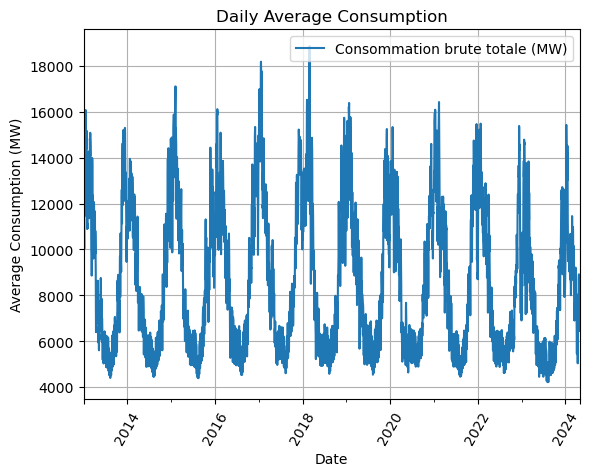

In [148]:
# Select only the necessary columns
df_selected = df_brute_totale[['Date', 'Consommation brute totale (MW)']]

# Set the 'Date' column as the index first, then resample
# df_weekly_avg = df_selected.set_index('Date').resample('W').mean()
df_daily_avg = df_selected.set_index('Date').resample('D').mean()


# Plot the result
df_daily_avg['Consommation brute totale (MW)'].plot(legend=True, grid=True, rot=60, 
                                                     xlabel='Date', 
                                                     ylabel='Average Consumption (MW)', 
                                                     title='Daily Average Consumption')
plt.show()

#### Create a properly structured DataFrame

In [149]:
# First, reset the index if the dates are in the index
if isinstance(df_daily_avg.index, pd.DatetimeIndex):
    df_daily_avg = df_daily_avg.reset_index()

# Create a properly structured DataFrame
df_daily_avg = pd.DataFrame({
    'Date': df_daily_avg['Date'].values,
    'Consommation brute totale (MW)': df_daily_avg['Consommation brute totale (MW)'].values.flatten()
})

### averaged par semaine

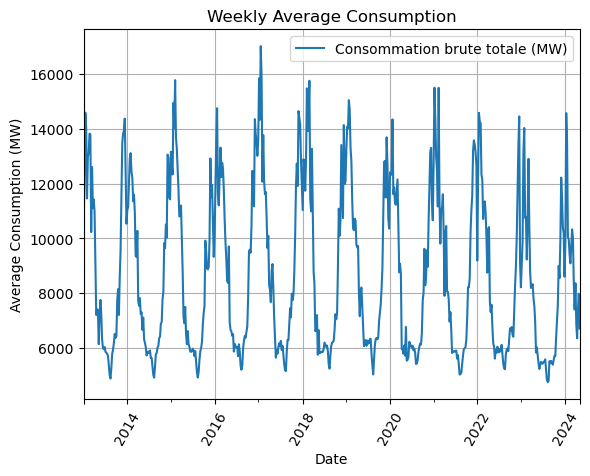

In [150]:
# Select only the necessary columns
df_selected = df_brute_totale[['Date', 'Consommation brute totale (MW)']]

# Set the 'Date' column as the index first, then resample
# df_weekly_avg = df_selected.set_index('Date').resample('W').mean()
df_weekly_avg = df_selected.set_index('Date').resample('W').mean()


# Plot the result
df_weekly_avg['Consommation brute totale (MW)'].plot(legend=True, grid=True, rot=60, 
                                                     xlabel='Date', 
                                                     ylabel='Average Consumption (MW)', 
                                                     title='Weekly Average Consumption')
plt.show()

#### Create a properly structured DataFrame

In [151]:
# First, reset the index if the dates are in the index
if isinstance(df_weekly_avg.index, pd.DatetimeIndex):
    df_weekly_avg = df_weekly_avg.reset_index()

# Create a properly structured DataFrame
df_weekly_avg = pd.DataFrame({
    'Date': df_weekly_avg['Date'].values,
    'Consommation brute totale (MW)': df_weekly_avg['Consommation brute totale (MW)'].values.flatten()
})

### averaged par mois

/tmp/ipykernel_42149/2633995925.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_avg = df_selected.set_index('Date').resample('M').mean()


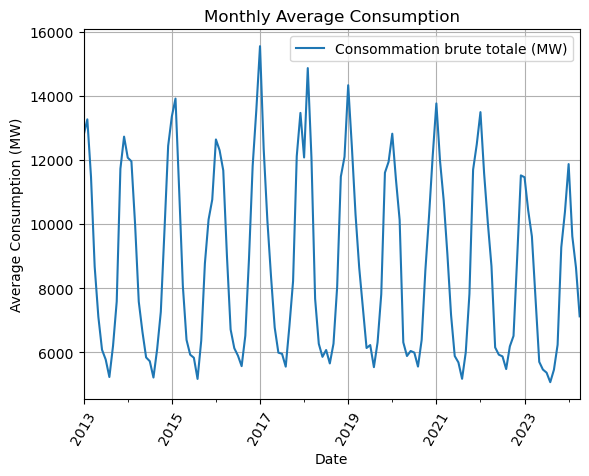

In [152]:
# Select only the necessary columns
df_selected = df_brute_totale[['Date', 'Consommation brute totale (MW)']]

# Set the 'Date' column as the index first, then resample
# df_weekly_avg = df_selected.set_index('Date').resample('W').mean()
df_monthly_avg = df_selected.set_index('Date').resample('M').mean()


# Plot the result
df_monthly_avg['Consommation brute totale (MW)'].plot(legend=True, grid=True, rot=60, 
                                                     xlabel='Date', 
                                                     ylabel='Average Consumption (MW)', 
                                                     title='Monthly Average Consumption')
plt.show()

#### Create a properly structured DataFrame

In [153]:
# First, reset the index if the dates are in the index
if isinstance(df_monthly_avg.index, pd.DatetimeIndex):
    df_monthly_avg = df_monthly_avg.reset_index()

# Create a properly structured DataFrame
df_monthly_avg = pd.DataFrame({
    'Date': df_monthly_avg['Date'].values,
    'Consommation brute totale (MW)': df_monthly_avg['Consommation brute totale (MW)'].values.flatten()
})

On choisit de travailler avec les données moyennées sur un mois

# ARIMA et SARIMA

## Etude de la stationnarité de la donnée

In [154]:
from statsmodels.tsa.stattools import acf, acovf

Text(0.5, 1.0, 'Autocovariance')

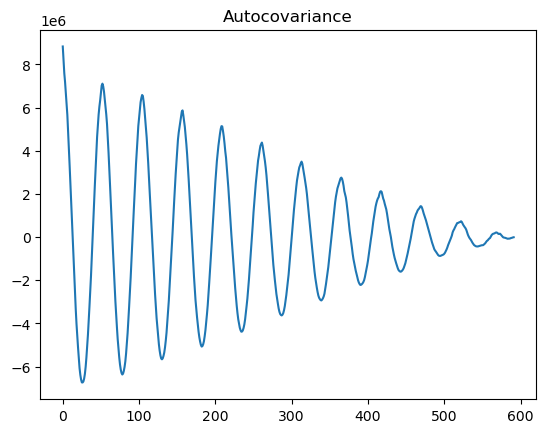

In [155]:
data_acovf = acovf(df_weekly_avg['Consommation brute totale (MW)'])
plt.plot(data_acovf)
plt.title('Autocovariance')

[ 1.          0.92769127  0.85951841  0.8139286   0.75332848  0.70123467
  0.64070513  0.55452378  0.46507496  0.37442132  0.27933357  0.18273634
  0.0842221  -0.01490706 -0.10793763 -0.20309955 -0.29523615 -0.37795511
 -0.45478406 -0.51947461 -0.57844881 -0.6363737  -0.687048   -0.72231002
 -0.74709064 -0.76210371 -0.76249174 -0.75737729]


Text(0.5, 1.0, 'Autocorrelation')

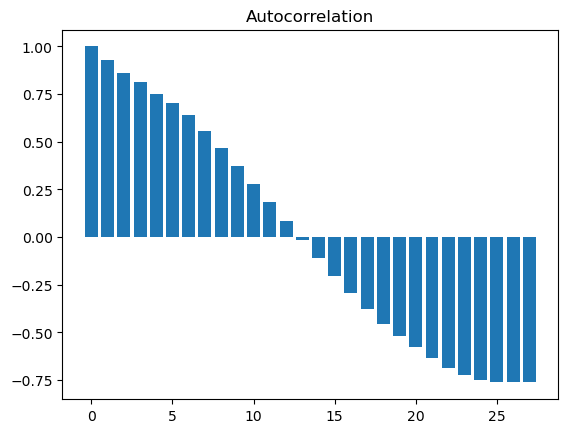

In [156]:
data_acf = acf(df_weekly_avg['Consommation brute totale (MW)'])
print(data_acf)
plt.bar(np.arange(len(data_acf)), data_acf)
plt.title('Autocorrelation')

Clairement on voit que la donnée n'est pas stationnaire, on la différencie pour séparer la tendance, la saisonnalité et le résidu (composante stationnaire).

## Différenciation

In [157]:
from statsmodels.tsa.seasonal import STL
import statsmodels

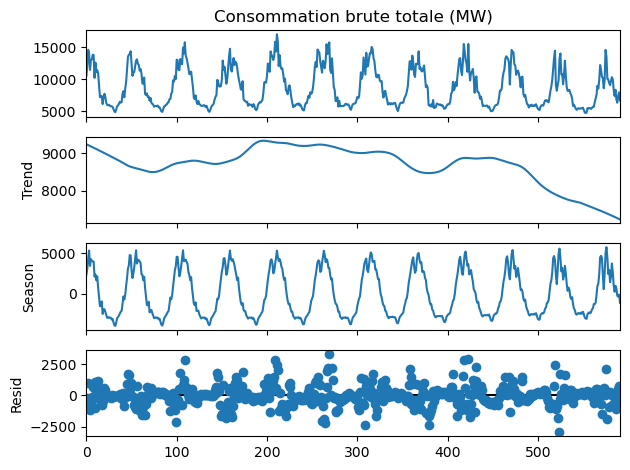

In [158]:
# For annual seasonality:
stl = statsmodels.tsa.seasonal.STL(df_weekly_avg['Consommation brute totale (MW)'], seasonal=11, period=52)
res = stl.fit()
fig = res.plot()

## Stationnarité du résidu

Text(0.5, 1.0, 'Autocovariance')

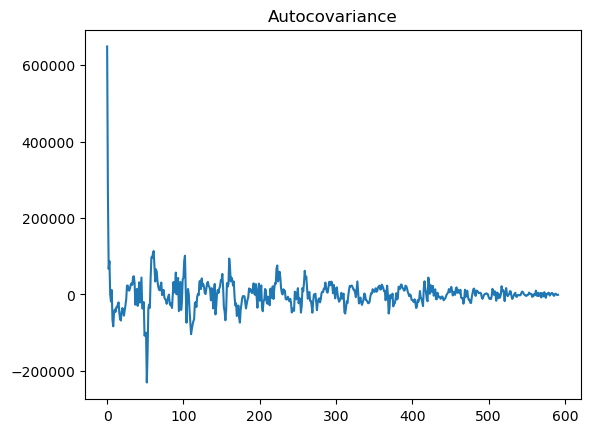

In [159]:
residu = res.resid

residu_acovf = acovf(residu)
plt.plot(residu_acovf)
plt.title('Autocovariance')

[ 1.00000000e+00  4.08907422e-01  1.02842310e-01  1.34643996e-01
  7.13312088e-04 -2.85567131e-02  1.76459844e-02 -1.02919426e-01
 -1.28473123e-01 -7.61912559e-02 -6.07060987e-02 -7.01393275e-02
 -5.18387317e-02 -5.25190549e-02 -3.98932474e-02 -3.18307486e-02
 -7.50681100e-02 -1.00020432e-01 -1.05121745e-01 -7.05300713e-02
 -5.46079756e-02 -6.68148394e-02 -8.52065790e-02 -6.59499105e-02
 -4.39103027e-02 -1.94533727e-02  3.52531294e-02  3.63491900e-02]


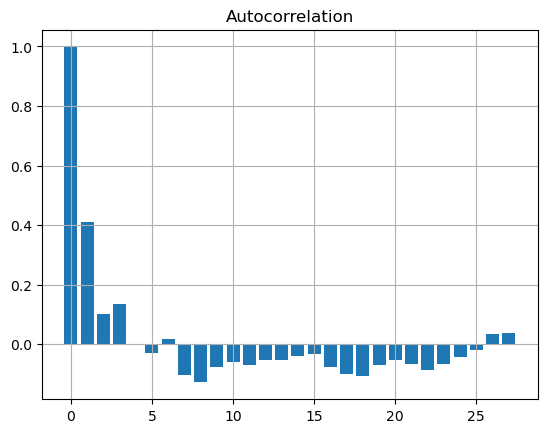

In [160]:
residu = res.resid
#residu_acf = statsmodels.tsa.stattools.acf(residu)
residu_acf = acf(residu)
print(residu_acf)
plt.bar(np.arange(len(residu_acf)), residu_acf)
plt.title('Autocorrelation')
plt.grid()

# Model AR et ARIMA

## Autocorrélation partielle du résidu

In [161]:
from statsmodels.tsa.stattools import pacf

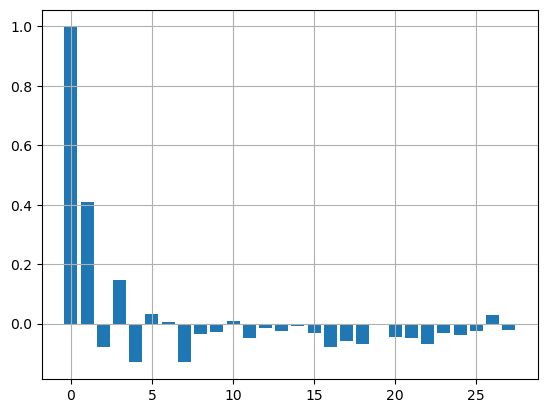

In [162]:
residu_pacf = pacf(residu)
plt.bar(np.arange(len(residu_pacf)), residu_pacf)
plt.grid()

## Test modèle AR

In [163]:
from statsmodels.tsa.ar_model import ar_select_order

In [164]:
p_values = range(0, 25)  # AR terms

bic_results = []

for p in p_values:
    # Fit the AR model
    sel = ar_select_order(residu, p, old_names=False)
    res = sel.model.fit()
    
    bic_results.append((res.bic, p))

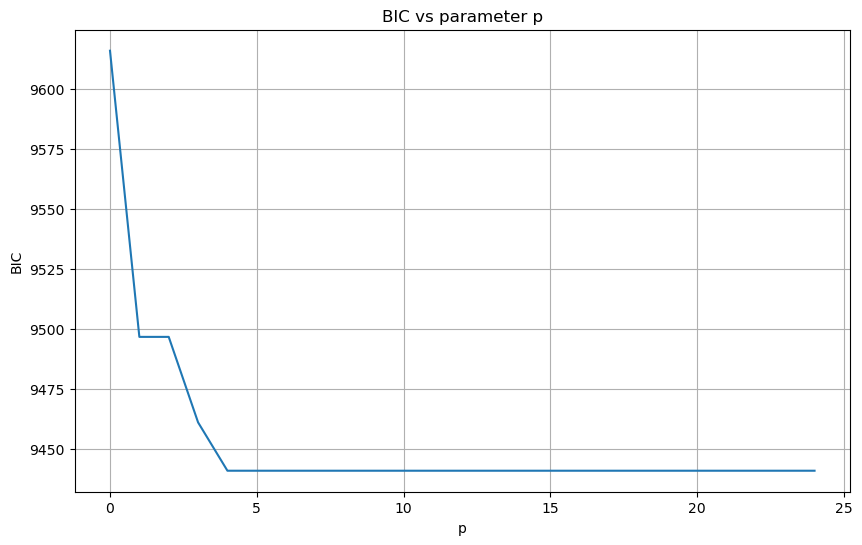

In [165]:
# Extract orders and BIC values from bic_results
orders = [order for _, order in bic_results]
bic_values = [bic for bic, _ in bic_results]

# Plot BIC vs Order
plt.figure(figsize=(10, 6))
plt.plot(orders, bic_values)
plt.xlabel('p')
plt.ylabel('BIC')
plt.title('BIC vs parameter p')
plt.grid(True)
plt.show()

In [166]:
# Find the model with the lowest BIC
best_model = min(bic_results, key=lambda x: x[0])
print(f"Best model: Order {best_model[1]} with BIC {best_model[0]}")

# # Display all results sorted by BIC
# sorted_bic_results = bic_results.sort(key=lambda x: x[0])
# for bic, order in sorted_bic_results:
#     print(f"Order {order}: BIC {bic}")

Best model: Order 4 with BIC 9440.957838258522


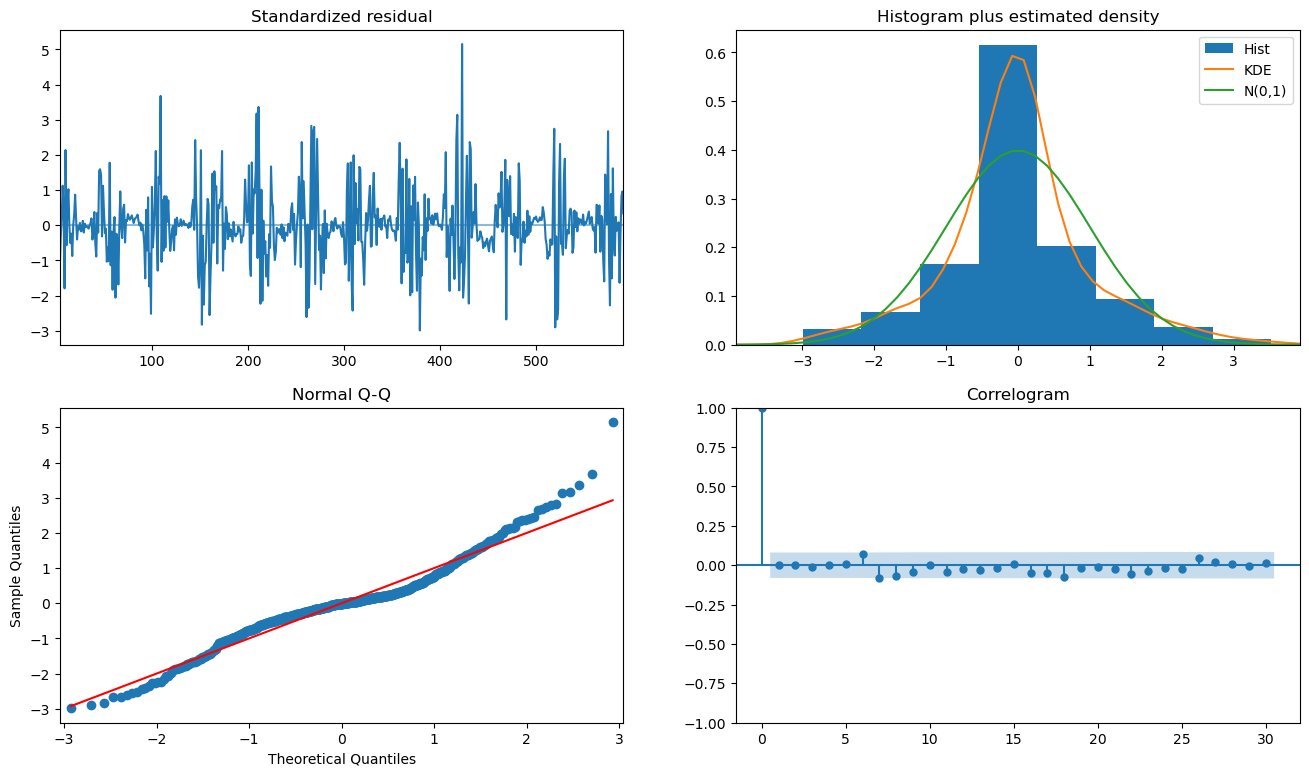

In [167]:
fig = plt.figure(figsize=(16, 9))
fig = res.plot_diagnostics(fig=fig, lags=30)

## Model ARMA

On cherche le meilleur model ARMA(p,q) avec p=4 (le même que celui trouvé précédemment)

In [201]:
from statsmodels.tsa.arima.model import ARIMA

In [200]:
p_values = range(4,5)  # AR terms
d_values = range(0, 1)  # Differencing terms
q_values = range(0, 30)  # MA terms

bic_results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            # Fit the ARIMA model
            model = ARIMA(df_weekly_avg['Consommation brute totale (MW)'], order=(p, d, q))
            model_fit = model.fit()
            
            # Append the BIC value and model order
            bic_results.append((model_fit.bic, (d,q)))


/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible s

KeyboardInterrupt: 

In [ ]:
# Find the model with the lowest BIC
best_model = min(bic_results, key=lambda x: x[0])
print(f"Best model: Order {best_model[1]} with BIC {best_model[0]}")

## Model ARIMA

On cherche le meilleur model ARMA(p,q) avec p=4 (le même que celui trouvé précédemment)

In [ ]:
p_values = range(4,5)  # AR terms
d_values = range(0, 0)  # Differencing terms
q_values = range(0, 30)  # MA terms

bic_results = []

for p in p_values:
    for d in d_values:
        for q in q_values:
            # Fit the ARIMA model
            model = ARIMA(df_weekly_avg['Consommation brute totale (MW)'], order=(p, d, q))
            model_fit = model.fit()
            
            # Append the BIC value and model order
            bic_results.append((model_fit.bic, (d,q)))


/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible s

/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/Anaconda3-2024.10/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/Anaconda3-2024.10/li

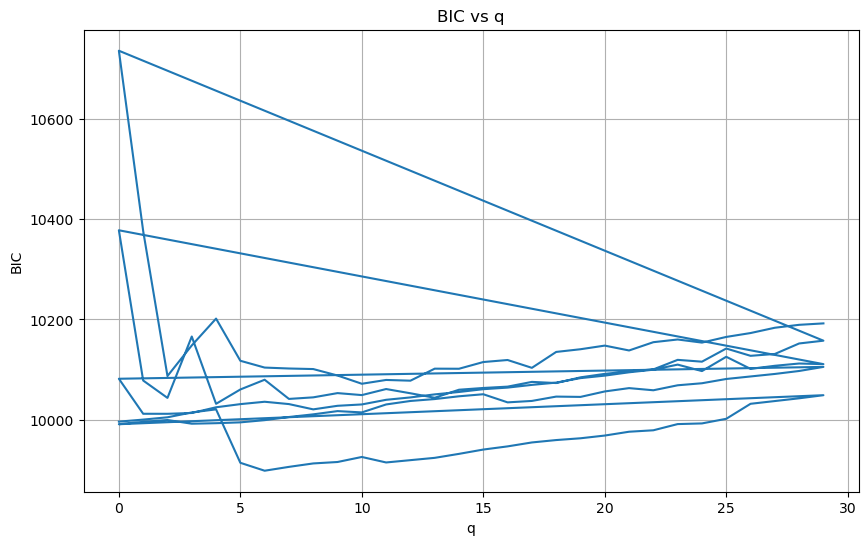

In [196]:
# Extract orders and BIC values from bic_results
orders = [order for _, order in bic_results]
bic_values = [bic for bic, _ in bic_results]

# Plot BIC vs Order
plt.figure(figsize=(10, 6))
plt.plot(orders, bic_values)
plt.xlabel('q')
plt.ylabel('BIC')
plt.title('BIC vs q')
plt.grid(True)
plt.show()

In [199]:
# Find the model with the lowest BIC
best_model = min(bic_results, key=lambda x: x[0])
print(f"Best model: Order {best_model[1]} with BIC {best_model[0]}")

Best model: Order (0, 6) with BIC 9898.941940068225


## Selection du best model

le meilleur model est en fait le AR(4), donc on garde celui-ci et on regarde les prédictions qu'il nous donne

In [172]:
from statsmodels.graphics.tsaplots import plot_predict

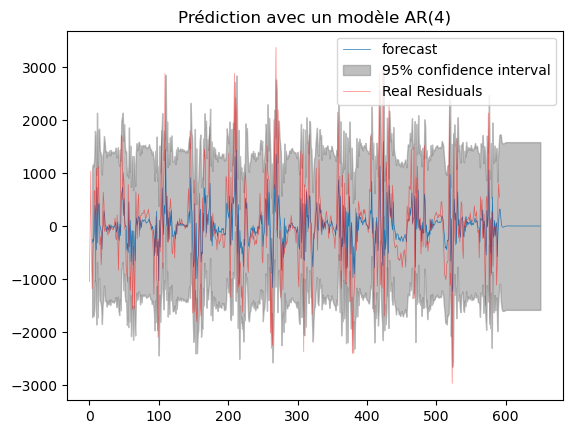

In [194]:
fig = plot_predict(ar_select_order(residu, 4, old_names=False).model.fit(), start=0, end=650)
ax = fig.gca()
ax.set_title("Prédiction avec un modèle AR(4)")
ax.plot(residu.index, residu[:residu.index[-1] + 1], color='red', label='Real Residuals', alpha=0.5)
for line in ax.get_lines():
    line.set_linewidth(0.5)  # Set the line width to make the prediction curve thinner
ax.legend()
